In [139]:
import pandas as pd
import numpy as np
import re

import pickle

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from imblearn.pipeline import make_pipeline as pipe_imblearn
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


## Load Dataset

In [133]:
data_train = pd.read_excel("Data/data_train.xlsx")
data_test = pd.read_excel("Data/data_test.xlsx")

data_train_ovr = pd.read_excel("Data/data_train_oversampling.xlsx")
data_train_sr = pd.read_excel("Data/data_train_edasr.xlsx")
data_train_ri = pd.read_excel("Data/data_train_edari.xlsx")
data_train_rs = pd.read_excel("Data/data_train_edars.xlsx")
data_train_rd = pd.read_excel("Data/data_train_edard.xlsx")
data_train_rird = pd.read_excel("Data/data_train_edarird.xlsx")

data_train_aug = pd.read_excel("Data/data_train_augment.xlsx")

In [134]:
X_train = data_train['Kalimat_prep']
y_train = data_train['label']

X_train_ovr = data_train_ovr['Kalimat_prep']
y_train_ovr = data_train_ovr['label']

X_train_sr = data_train_sr['Kalimat_prep']
y_train_sr = data_train_sr['label']

X_train_ri = data_train_ri['Kalimat_prep']
y_train_ri = data_train_ri['label']

X_train_rs = data_train_rs['Kalimat_prep']
y_train_rs = data_train_rs['label']

X_train_rd = data_train_rd['Kalimat_prep']
y_train_rd = data_train_rd['label']

X_train_rird = data_train_rird['Kalimat_prep']
y_train_rird = data_train_rird['label']

X_train_aug = data_train_aug['Kalimat_prep']
y_train_aug = data_train_aug['label']

X_test = data_test['Kalimat_prep']
y_test = data_test['label']

## Oversampling

### oversampling using EDA

In [97]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_ovr,y_train_ovr)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.4900867052023121


In [98]:
with open("Model/oversampling_eda_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### Oversampling EDA - SR only

In [114]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_sr,y_train_sr)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.4591142120270284


In [115]:
with open("Model/oversampling_edasr_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### Oversampling EDA - RI only

In [126]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_ri,y_train_ri)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.4953285775074467


In [120]:
with open("Model/oversampling_edari_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### Oversampling EDA - RS only

In [129]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_rs,y_train_rs)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.4743948846776766


In [130]:
with open("Model/oversampling_edars_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### Oversampling EDA - RD only

In [131]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_rd,y_train_rd)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.49826206639139664


In [132]:
with open("Model/oversampling_edard_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### Oversampling EDA - RI and RD

In [135]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_rird,y_train_rird)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.48789002181178964


In [136]:
with open("Model/oversampling_edarird_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm,f)

### oversampling using SMOTE

In [137]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
smote = SMOTE(random_state=10, n_jobs=-1)
model_svm_sm = SVC(kernel='linear', C=1)

pipeline_svm_sm = pipe_imblearn(tfidf_vectorizer,smote,model_svm)

pipeline_svm_sm.fit(X_train,y_train)

print(f"maco avg f1_score : {f1_score(y_test,pipeline_svm_sm.predict(X_test),average='macro')}")

maco avg f1_score : 0.5144752739909114


In [107]:
with open("Model/oversampling_smote_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm_sm,f)

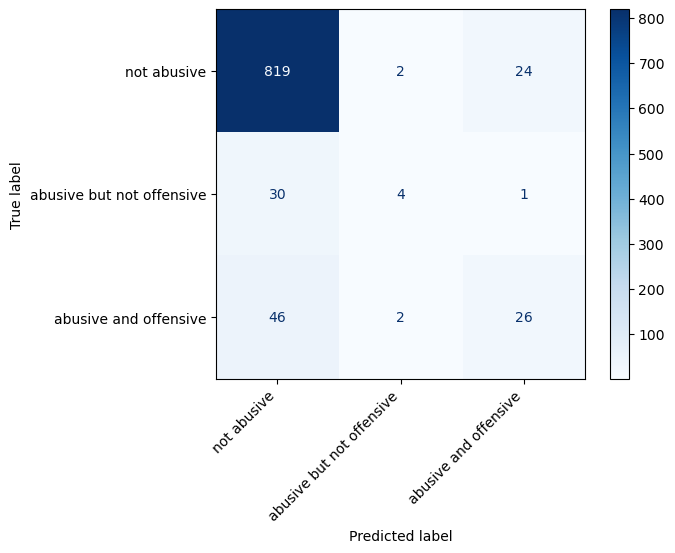

In [140]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,pipeline_svm_sm.predict(X_test)),
                              display_labels=["not abusive","abusive but not offensive","abusive and offensive"])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')
plt.show()

In [142]:
data_test_anl = data_test.copy()
data_test_anl['pred'] = pipeline_svm_sm.predict(X_test) #954 rows
data_test_anl = data_test_anl[data_test_anl['label']!=data_test_anl['pred']]
data_test_anl.shape

(105, 5)

In [147]:
#CEK OOV
def oov(text,features):
    text_split = text.split(" ")
    oov_ls = [i for i in text_split if i not in features]
    return oov_ls

data_test_anl['oov'] = data_test_anl['Kalimat_prep'].apply(lambda x: oov(x,pipeline_svm_sm[0].get_feature_names_out()))
data_test_anl['num_oov'] = data_test_anl['oov'].apply(lambda x: len(x))

In [148]:
data_test_anl

,index,Kalimat,Kalimat_prep,label,pred,oov,num_oov
3,158,Ngapain beli perusahaan yg mau ambruk dasar dungu,ngapain beli perusahaan yang mau ambruk dasar ...,1,3,[],0
4,2183,"Bukan lupa lagi judulnya, tapi blaga BUDEK iya...",bukan lupa lagi judulnya tapi blaga budek iya ...,3,1,"[judulnya, blaga, budek]",3
6,482,pengin b*rak tiap liat muka ni orang gw,pengin biasa rak tiap liat muka ni orang gue,3,1,[rak],1
12,1331,"toket yang ada di pantung, gambar, lukisan.\ns...",toket yang ada di pantung gambar lukisan semua...,3,1,"[pantung, lukisan, yanng, terapkan, ']",5
21,861,"tiket nya di poto, cemilan nya di poto, kursin...",tiket nya di poto cemilan nya di poto kursinya...,3,1,"[kursinya, meki]",2
...,...,...,...,...,...,...,...
905,3059,lu gila ya. djarum ga usa exploitasi jg uda pa...,lu gila ya djarum ga usa exploitasi juga uda p...,2,1,[],0
919,2841,DasaaarÔøΩ oonÔøΩ sama saja atuh mau ada PPÔøΩ...,dasaaar oon sama saja atuh mau ada pulang perg...,1,3,"[dasaaar, cuaap]",2
937,303,"Tol mahal tapi hemat bbm, hemat uang makan, he...",tol mahal tapi hemat ' hemat uang makan hemat ...,3,1,"[', pijat, makro, terjebak, bani]",5
941,2031,"RIP KPK, Jokowi memble di pemberantasan korups...",rip kpk jokowi memble di pemberantasan korupsi...,3,1,"[memble, penegakanan]",2


In [150]:
data_test_anl['num_oov'].mean()

2.4285714285714284

In [154]:
data_test_anl[data_test_anl['num_oov']>0].shape[0]/data_test_anl.shape[0] #74/105

0.7047619047619048

In [149]:
data_test_anl.to_excel("Data/data_missclassify.xlsx",index=False)

## Augmentation

In [110]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
model_svm = SVC(kernel='linear', C=1)

pipeline_svm = make_pipeline(tfidf_vectorizer,model_svm)

pipeline_svm.fit(X_train_aug,y_train_aug)

print(f"maco avg f1_score : {f1_score(pipeline_svm.predict(X_test),y_test,average='macro')}")

maco avg f1_score : 0.4795043834216434


In [111]:
with open("Model/aug_eda_svm.pkl","wb") as f:
    pickle.dump(pipeline_svm_sm,f)